**Part 1:** Acquire power data (source) for at least 10 days and not more than 40 days. Load the data into a Jupyter Notebook. Create two bar graphs of the power consumption per hour. One bar graph has 24 bars; one bar graph has 24*(number of days) bars. Submit the .ipynb file containing the analysis and the generated pictures.

In [1]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import timeit

In [2]:
# set start time

start_time1 = timeit.default_timer()

In [3]:
# load data into jupyter notebook

# date range - 1/1/21 through 1/6/21
path_to_file1 = (r'C:\Users\HaChoi\School\input_data\RollingSystemDemand_20210328_0153.csv')

# date range - 1/7/21 through 1/12/21
path_to_file2 = (r'C:\Users\HaChoi\School\input_data\RollingSystemDemand_20210328_0153 (1).csv')

# date range - 1/13/21 through 1/18/21
path_to_file3 = (r'C:\Users\HaChoi\School\input_data\RollingSystemDemand_20210328_0154.csv')

# date range - 1/19/21 through 1/24/21
path_to_file4 = (r'C:\Users\HaChoi\School\input_data\RollingSystemDemand_20210328_0154 (1).csv')

# date range - 1/25/21 through 1/30/21
path_to_file5 = (r'C:\Users\HaChoi\School\input_data\RollingSystemDemand_20210328_0154 (2).csv')

# date range - 1/31/21
path_to_file6 = (r'C:\Users\HaChoi\School\input_data\RollingSystemDemand_20210328_0154 (3).csv')

# read csv files with pandas
headers = ['0','Date_Time', 'Energy Consumption']
input_file1 = pd.read_csv(path_to_file1, names = headers)
input_file2 = pd.read_csv(path_to_file2, names = headers)
input_file3 = pd.read_csv(path_to_file3, names = headers)
input_file4 = pd.read_csv(path_to_file4, names = headers)
input_file5 = pd.read_csv(path_to_file5, names = headers)
input_file6 = pd.read_csv(path_to_file6, names = headers)

In [4]:
# erase last row
data1 = input_file1[1:-1]
data2 = input_file2[1:-1]
data3 = input_file3[1:-1]
data4 = input_file4[1:-1]
data5 = input_file5[1:-1]
data6 = input_file6[1:-1]

# merge two files 
merge_df = [data1, data2, data3, data4, data5, data6]
df1 = pd.concat(merge_df)

df1.head()

,0,Date_Time,Energy Consumption
1,VD,20210101000000,28762.0
2,VD,20210101000500,28859.0
3,VD,20210101001000,28962.0
4,VD,20210101001500,28992.0
5,VD,20210101002000,28898.0


In [5]:
# clean dataframe - drop first column and rename rest of the columns

clean_df1 = df1.drop('0', 1).rename(columns = {'1':'Date_Time', '2':'Energy Consumption'})

clean_df1.head()

,Date_Time,Energy Consumption
1,20210101000000,28762.0
2,20210101000500,28859.0
3,20210101001000,28962.0
4,20210101001500,28992.0
5,20210101002000,28898.0


In [6]:
# split out date and time into date and hour

clean_df1['Date_Time'] = pd.to_datetime(clean_df1['Date_Time'])
clean_df1['Hour'] = clean_df1['Date_Time'].dt.hour
clean_df1['Date'] = (clean_df1['Date_Time'].dt.strftime('%m-%d'))

clean_df1.dtypes

Date_Time             datetime64[ns]
Energy Consumption           float64
Hour                           int64
Date                          object
dtype: object

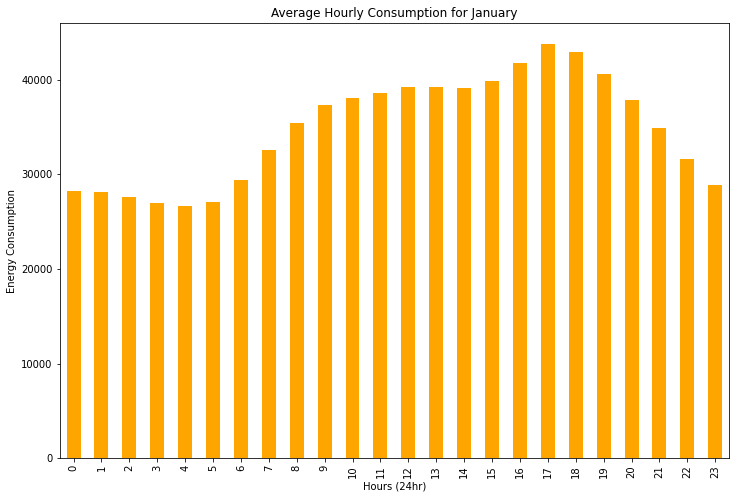

In [7]:
# create bar chart for average hourly consumption 

hourly_grouped = clean_df1.groupby(['Hour'])['Energy Consumption'].mean()
hourly_grouped.plot.bar(x="Hour", y="Energy Consumption", figsize = (12,8), color = 'orange')

plt.title("Average Hourly Consumption for January")
plt.xlabel("Hours (24hr)")
plt.ylabel("Energy Consumption")
plt.show()

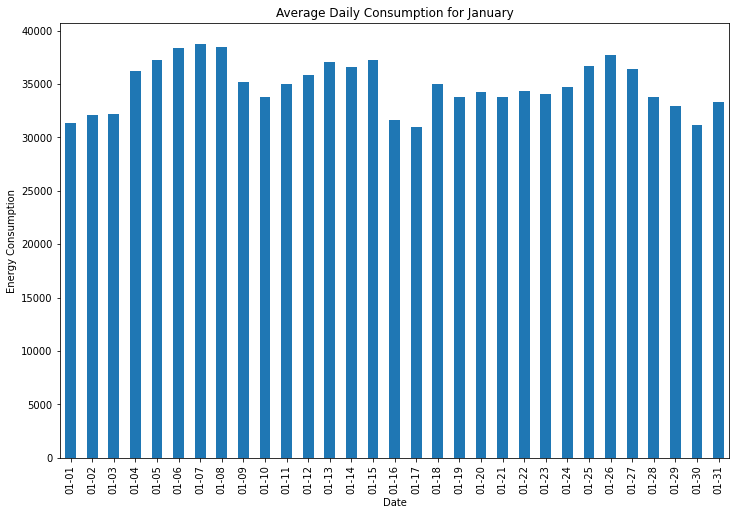

In [8]:
# create bar chart for average daily consumption 

daily_grouped = clean_df1.groupby(['Date'])['Energy Consumption'].mean()
daily_grouped.plot.bar(x="Date", y="Energy Consumption", figsize = (12,8))

plt.title("Average Daily Consumption for January")
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.show()

In [9]:
# calculate elapsed time for the original notebook

elapsed1 = timeit.default_timer()-start_time1
print('Elapsed Time:', elapsed1)

Elapsed Time: 2.3526344000000003


In [10]:
# start time for the refactored notebook

start_time2 = timeit.default_timer()

In [11]:
# load data into jupyter notebook

os.chdir("C://Users/HaChoi/School/input_data")
data_files = os.listdir()

data = []
headers = ['0','Date_Time', 'Energy Consumption']

for file in data_files:
    raw_data = pd.read_csv(file, skipfooter = 1, names = headers, skiprows = 1, engine = 'python')
    data.append(raw_data)

df2 = pd.concat(data).drop('0', 1)

In [12]:
# split out date and time into date and hour

df2['Date_Time'] = pd.to_datetime(df2['Date_Time'], format ='%Y%m%d%H%M%S')
df2['Hour'] = df2['Date_Time'].dt.hour
df2['Date'] = (df2['Date_Time'].dt.strftime('%m-%d'))

df2.dtypes

Date_Time             datetime64[ns]
Energy Consumption             int64
Hour                           int64
Date                          object
dtype: object

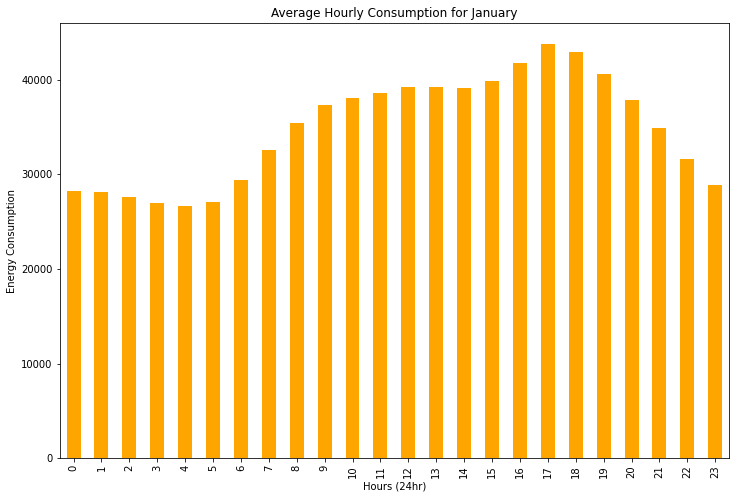

In [13]:
# create bar chart for average hourly consumption 

hourly_grouped = df2.groupby(['Hour'])['Energy Consumption'].mean()
hourly_grouped.plot.bar(x="Hour", y="Energy Consumption", figsize = (12,8), color = 'orange')

plt.title("Average Hourly Consumption for January")
plt.xlabel("Hours (24hr)")
plt.ylabel("Energy Consumption")
plt.show()

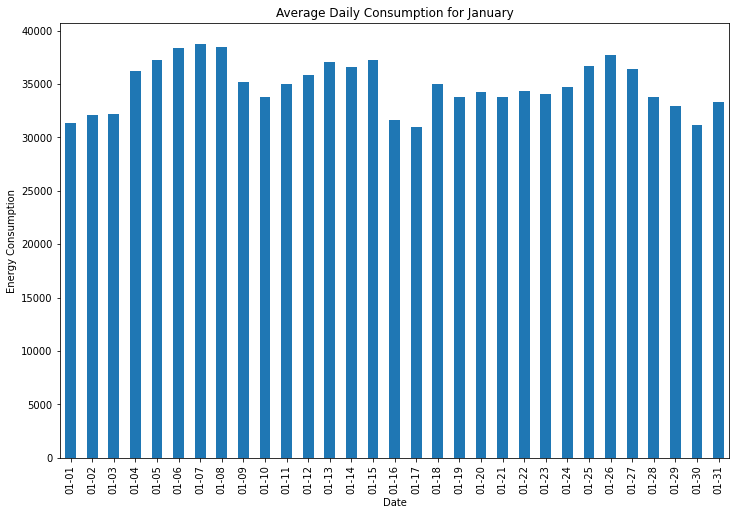

In [14]:
# create bar chart for average daily consumption 

daily_grouped = df2.groupby(['Date'])['Energy Consumption'].mean()
daily_grouped.plot.bar(x="Date", y="Energy Consumption", figsize = (12,8))

plt.title("Average Daily Consumption for January")
plt.xlabel("Date")
plt.ylabel("Energy Consumption")
plt.show()

In [15]:
# calculate elapsed time 

elapsed2 = timeit.default_timer()-start_time2
print('Elapsed Time:', elapsed2)

Elapsed Time: 1.3363366


In [16]:
# final results 

time_diff = elapsed1 - elapsed2
print('Refactoring the code improved runtime by', round(time_diff,3), 'seconds.')

Refactoring the code improved runtime by 1.016 seconds.
